# Data Analysis

The notebook presents the data analysis process performed on the Eynsham 70k Dataset, aimed at evaluating the model's ability to detect the same localization in different photos.

The Eynsham 70k Dataset, which consists of a series of images taken from two loops over the same localization, is used by the authors to test the effectiveness of a model in localizing and identifying the same object or region across various images. The dataset captures different perspectives from a camera system, and the challenge is to detect and match the same localization from images taken from different angles or distances.

## Imports

In [1]:
from utils.data import *

## Visualizations

This section is focused on brief, simple visualizations of the available data.

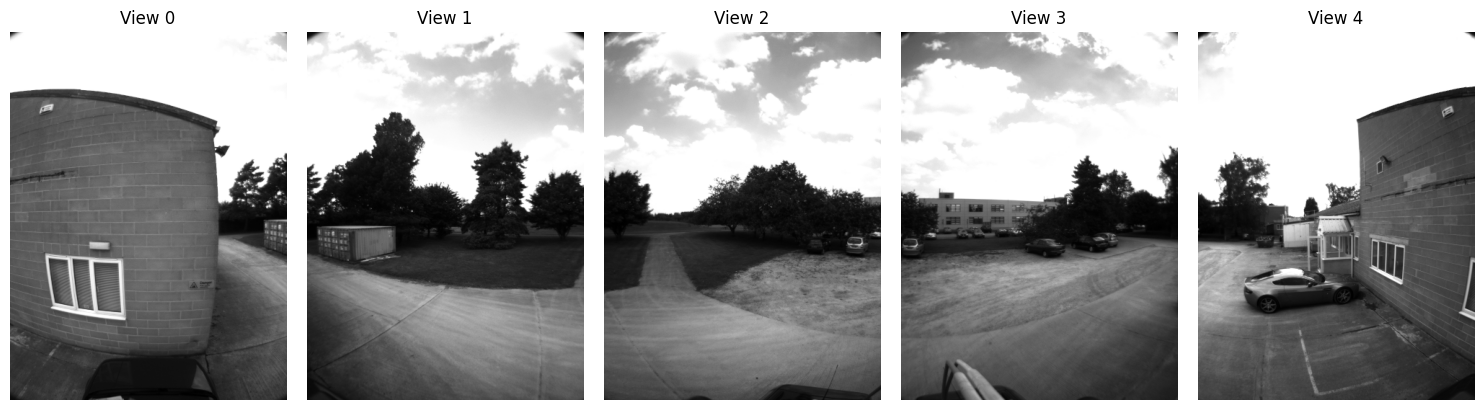

In [2]:
display_views(base_name='grab_0.000')

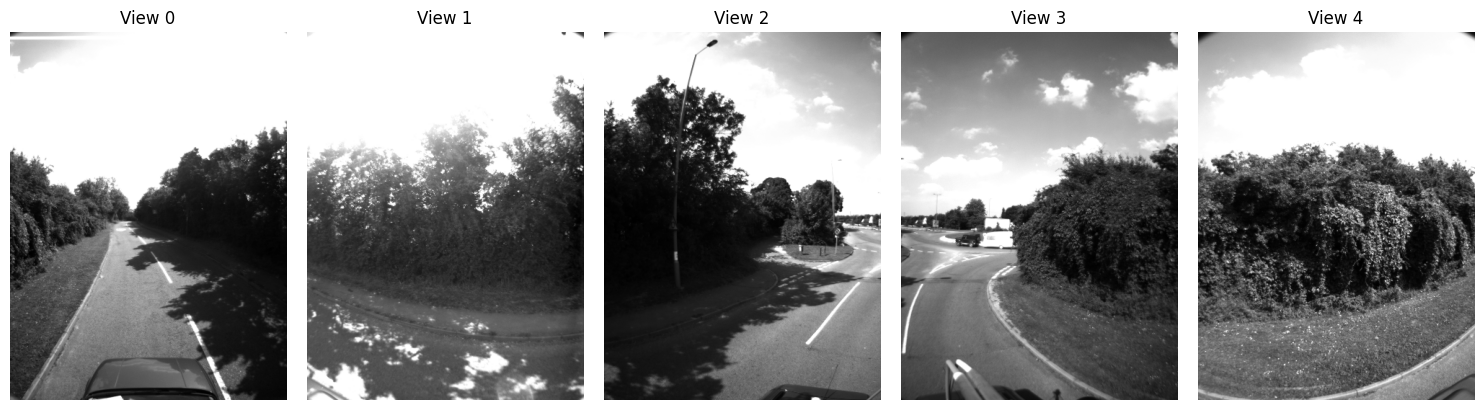

In [3]:
display_views(base_name='grab_1216907830.929')

## Matching Locations

This section focuses on the analysis of identifying the same localizations across different photos.

Initially, by counting the number of images in both loops, it was observed that the first loop contains more images than the second one. Due to this discrepancy, a naive image matching approach could not be applied. Instead, the images were matched based on the distance between their corresponding N and E coordinates. Specifically, each image from the smaller loop was paired with the closest image from the larger loop, ensuring that different photos represented the same location.

Ultimately, the data was combined into a single dataframe, allowing for easy visualization of the corresponding image pairs. A selected pair of images was then displayed for comparison, and the results were saved for further analysis.

In [4]:
count_loop_pair()

Total length of data: 9575
Photos before loop: 4804
Photos after loop: 4772
Difference in number of photos: 32


In [5]:
loop1_entries = parse_log_with_gps_alignment('Eynsham/Raw_Logs/CarData_24_7_2008_____13_54_03/CarData_24_7_2008_____13_54_03.alog')
loop2_entries = parse_log_with_gps_alignment('Eynsham/Raw_Logs/CarData_24_7_2008_____15_10_45/CarData_24_7_2008_____15_10_45.alog')
print(loop1_entries[0])
print(loop2_entries[0])
print(f"Num photos in loop 1: {len(loop1_entries)}")
print(f"Num photos in loop 2: {len(loop2_entries)}")

{'base_name': 'grab_0.000', 'N': 6330.726, 'E': -3492.828, 'X': -3327.683, 'Y': 6402.543}
{'base_name': 'grab_0.000', 'N': 4990.186, 'E': -3022.434, 'X': -2891.14, 'Y': 5053.249}
Num photos in loop 1: 5077
Num photos in loop 2: 4499


In [6]:
loop1_entries = pd.DataFrame(loop1_entries)
loop1_entries.head()

,base_name,N,E,X,Y
0,grab_0.000,6330.726,-3492.828,-3327.683,6402.543
1,grab_1216904045.433,6332.630,-3488.310,-3323.138,6404.339
2,grab_1216904076.066,6328.042,-3487.019,-3321.962,6399.729
3,grab_1216904082.699,6322.853,-3486.083,-3321.153,6394.527
4,grab_1216904084.742,6318.937,-3485.394,-3320.560,6390.602


In [7]:
loop2_entries = pd.DataFrame(loop2_entries)
loop2_entries.drop(0, inplace=True) # Dropped due to inconsistencies, double save of grab_0.000
loop2_entries = loop2_entries.reset_index(drop=True)
loop2_entries.head()

,base_name,N,E,X,Y
0,grab_1216908647.318,4994.928,-3023.441,-2892.030,5058.007
1,grab_1216908662.125,4991.210,-3017.480,-2886.182,5054.156
2,grab_1216908678.463,4987.743,-3012.651,-2881.456,5050.583
3,grab_1216908679.824,4985.295,-3008.686,-2877.566,5048.046
4,grab_1216908680.845,4983.482,-3004.505,-2873.445,5046.139


In [8]:
combined_data = create_closest_mapping(loop2_entries, loop1_entries)
combined_data = pd.DataFrame(combined_data)
combined_data.head()

,location_name_1,N_1,E_1,X_1,Y_1,location_name_2,N_2,E_2,X_2,Y_2
0,grab_1216908647.318,4994.928,-3023.441,-2892.030,5058.007,grab_1216904541.487,4993.276,-3019.528,-2888.173,5056.267
1,grab_1216908662.125,4991.210,-3017.480,-2886.182,5054.156,grab_1216908018.296,4988.612,-3018.339,-2887.100,5051.583
2,grab_1216908678.463,4987.743,-3012.651,-2881.456,5050.583,grab_1216908016.595,4986.539,-3014.175,-2883.003,5049.416
3,grab_1216908679.824,4985.295,-3008.686,-2877.566,5048.046,grab_1216904557.318,4984.349,-3008.709,-2877.612,5047.102
4,grab_1216908680.845,4983.482,-3004.505,-2873.445,5046.139,grab_1216904558.844,4982.276,-3004.523,-2873.492,5044.936


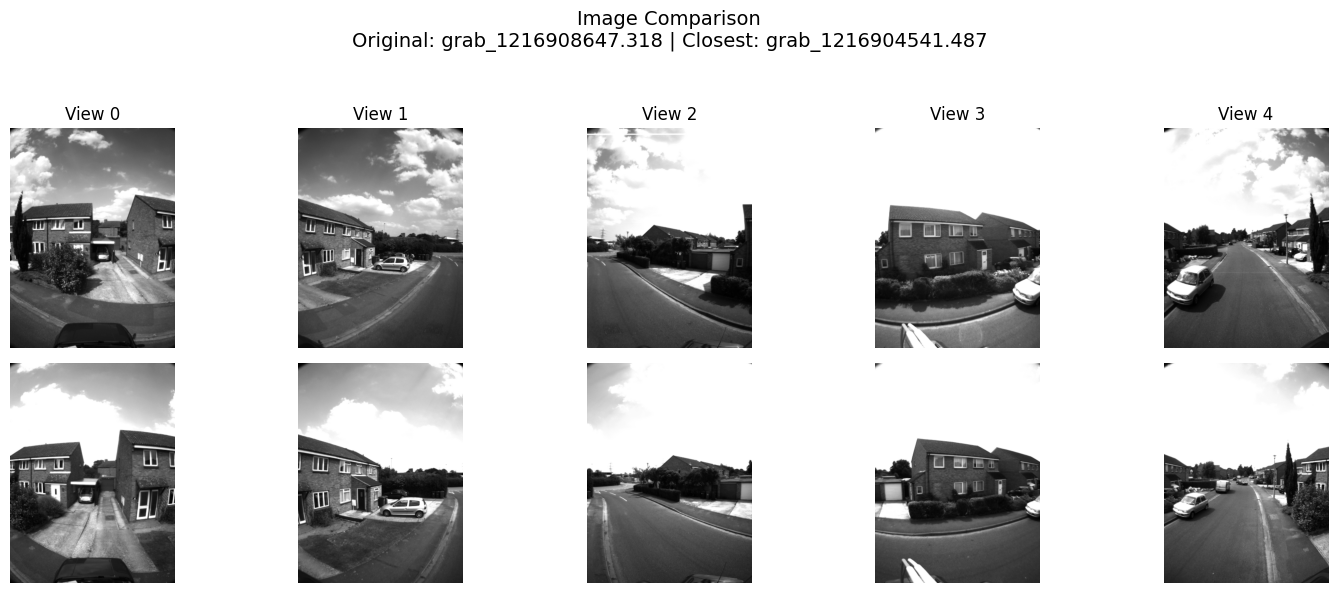

In [9]:
display_dual_views(combined_data, 0)

## Saving The Data

The results relating to the saved data can be found in the ./data directory.

In [10]:
os.makedirs("./data", exist_ok=True)
combined_data.to_csv('./data/nearest_places_mapping.csv', index=False)